# Comparison of nutritional information at different American Fast Food chains.
## In this study I used data from McDonalds, Dairy Queen, Chick Fil-A, Subway, Burger King, Sonic, Taco Bell, and Arbys.

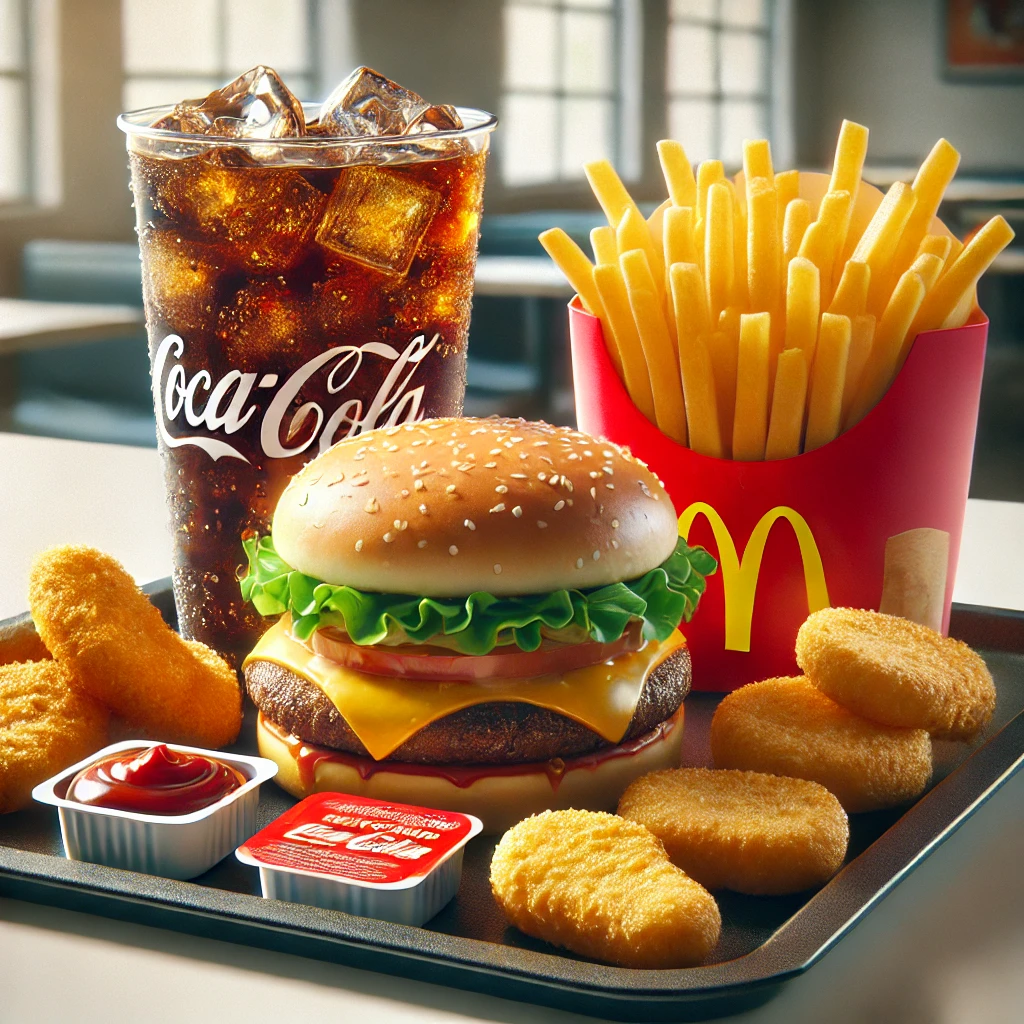

### I used the numpy, pandas, seaborn, matplotlib, and plotly packages to work with the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Case Studies/Fast Food/fastfood.csv')

## Let's get a general sense of the data.

In [7]:
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [5]:
display(df)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


In [8]:
df.shape

(515, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [10]:
missing_values = df.isnull().sum()
print(missing_values)

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64


In [11]:
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


## Which restaurants carry the most calories per food item?

<ipython-input-33-fb4650f6c700>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df.groupby('restaurant')['calories'].mean().sort_values(ascending=False), y=df.groupby('restaurant')['calories'].mean().sort_values(ascending=False).index, palette = 'Spectral')


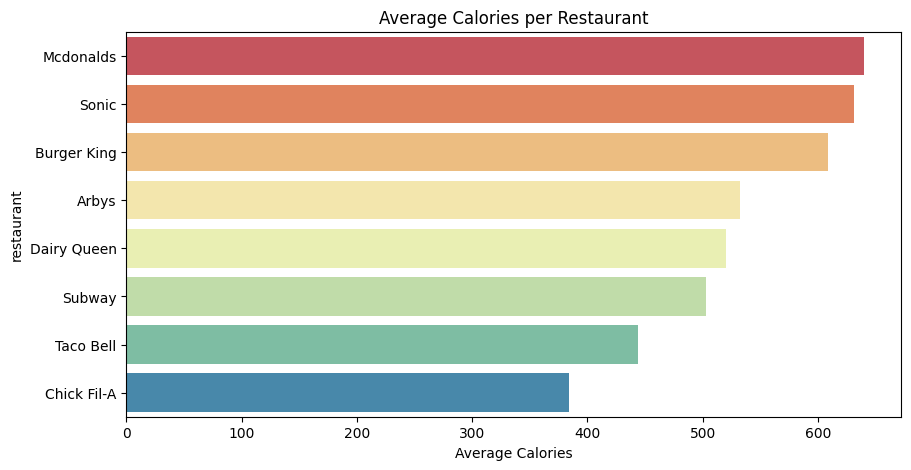

In [33]:
df.groupby('restaurant')['calories'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
ax = sns.barplot(x=df.groupby('restaurant')['calories'].mean().sort_values(ascending=False), y=df.groupby('restaurant')['calories'].mean().sort_values(ascending=False).index, palette = 'Spectral')
ax.set_title("Average Calories per Restaurant")
ax.set_xlabel("Average Calories");

## Which are the highest calorie fast food items all together?

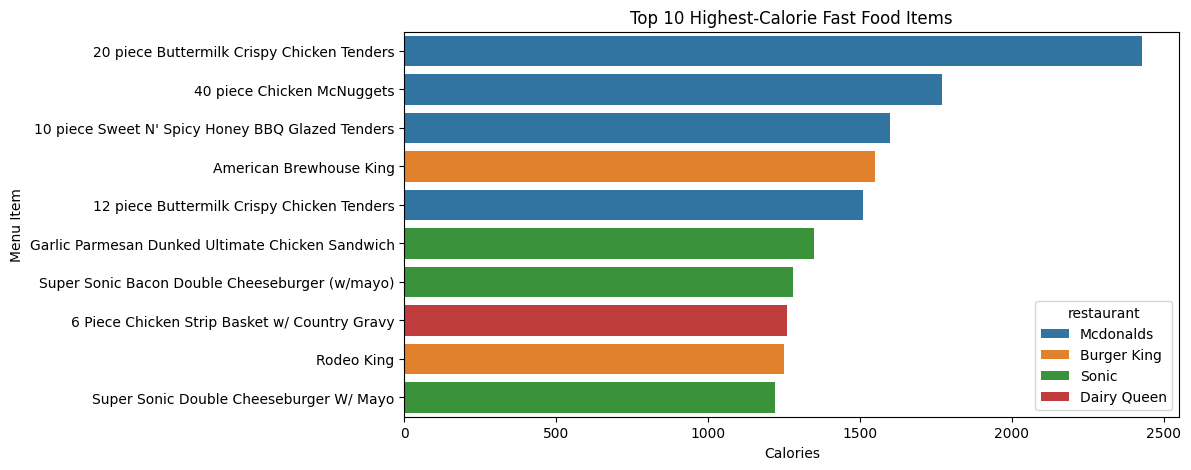

In [18]:
df_top_calories = df.nlargest(10, "calories")

plt.figure(figsize=(10,5))
sns.barplot(data=df_top_calories, x="calories", y="item", hue="restaurant", dodge=False)
plt.title("Top 10 Highest-Calorie Fast Food Items")
plt.xlabel("Calories")
plt.ylabel("Menu Item")
plt.show()

Evidently, McDonalds has 4 of the 10 highest calorie items among the 8 restaurants. Sonic then has 3 of the top 10 calorie-dense items, BK with 2, and DQ with 1.

##Which restaurants carry the most fat per item?

In [6]:
df.groupby('restaurant')['total_fat'].mean().sort_values(ascending=False)

,total_fat
restaurant,
Sonic,37.641509
Burger King,36.814286
Mcdonalds,31.807018
Dairy Queen,28.857143
Arbys,26.981818
Taco Bell,20.895652
Subway,18.479167
Chick Fil-A,16.148148


##Which restaurants carry the most sugar per item?

In [7]:
df.groupby('restaurant')['sugar'].mean().sort_values(ascending=False)

,sugar
restaurant,
Mcdonalds,11.070175
Subway,10.093750
Burger King,8.185714
Arbys,7.563636
Sonic,6.528302
Dairy Queen,6.357143
Chick Fil-A,4.148148
Taco Bell,3.704348


## Which restaurants carry the most cholesterol per item?

In [8]:
df.groupby('restaurant')['cholesterol'].mean().sort_values(ascending=False)

,cholesterol
restaurant,
Mcdonalds,109.736842
Burger King,100.857143
Sonic,86.981132
Chick Fil-A,79.074074
Dairy Queen,71.547619
Arbys,70.454545
Subway,61.302083
Taco Bell,39.043478


## Which restaurants carry the most sodium per item?

In [9]:
df.groupby('restaurant')['sodium'].mean().sort_values(ascending=False)

,sodium
restaurant,
Arbys,1515.272727
Mcdonalds,1437.894737
Sonic,1350.754717
Subway,1272.968750
Burger King,1223.571429
Dairy Queen,1181.785714
Chick Fil-A,1151.481481
Taco Bell,1013.913043


## What's the highest value of each nutritional variable at each restaurant?

In [7]:
metrics = ['calories', 'sugar', 'sodium', 'total_carb', 'total_fat', 'protein', 'calcium', ]

In [8]:
highest_means ={}

In [9]:
nutritional_metrics = ['calories', 'total_fat', 'sugar', 'sodium', 'total_carb', 'protein', 'calcium']

highest_values = df.groupby('restaurant')[nutritional_metrics].max().reset_index()

print(highest_values)

    restaurant  calories  total_fat  sugar  sodium  total_carb  protein  \
0        Arbys      1030         59     23    3350          83     62.0   
1  Burger King      1550        126     37    2310          69    134.0   
2  Chick Fil-A       970         47     12    3660          70    103.0   
3  Dairy Queen      1260         75     30    3500         121     49.0   
4    Mcdonalds      2430        141     87    6080         156    186.0   
5        Sonic      1350        100     17    4520         126     67.0   
6       Subway      1160         62     36    3540         118     78.0   
7    Taco Bell       880         42      8    2260         107     37.0   

   calcium  
0     45.0  
1      NaN  
2     35.0  
3    100.0  
4    290.0  
5     40.0  
6    100.0  
7     45.0  


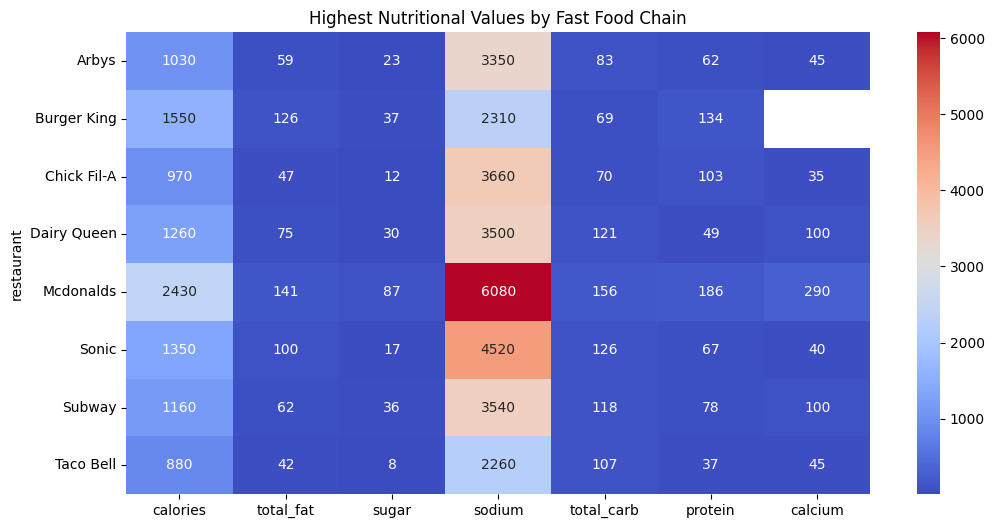

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(highest_values.set_index("restaurant"), annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Highest Nutritional Values by Fast Food Chain")
plt.show()

## What's the average of each nutritional value at each restaurant?

In [11]:
average_values = df.groupby('restaurant')[nutritional_metrics].mean().reset_index()

print(average_values)

    restaurant    calories  total_fat      sugar       sodium  total_carb  \
0        Arbys  532.727273  26.981818   7.563636  1515.272727   44.872727   
1  Burger King  608.571429  36.814286   8.185714  1223.571429   39.314286   
2  Chick Fil-A  384.444444  16.148148   4.148148  1151.481481   28.629630   
3  Dairy Queen  520.238095  28.857143   6.357143  1181.785714   38.690476   
4    Mcdonalds  640.350877  31.807018  11.070175  1437.894737   48.789474   
5        Sonic  631.698113  37.641509   6.528302  1350.754717   47.207547   
6       Subway  503.020833  18.479167  10.093750  1272.968750   54.718750   
7    Taco Bell  443.652174  20.895652   3.704348  1013.913043   46.634783   

     protein    calcium  
0  29.254545  17.360000  
1  30.014493        NaN  
2  31.703704  11.320000  
3  24.833333  16.407407  
4  40.298246  20.596491  
5  29.188679  17.244898  
6  30.312500  39.125000  
7  17.417391  24.807692  


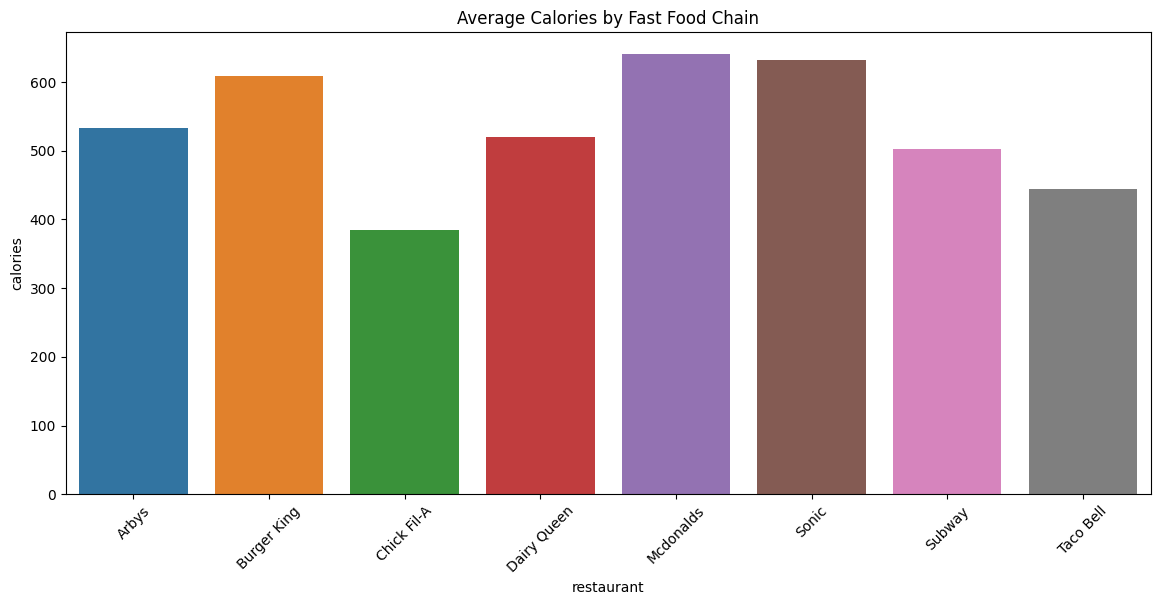

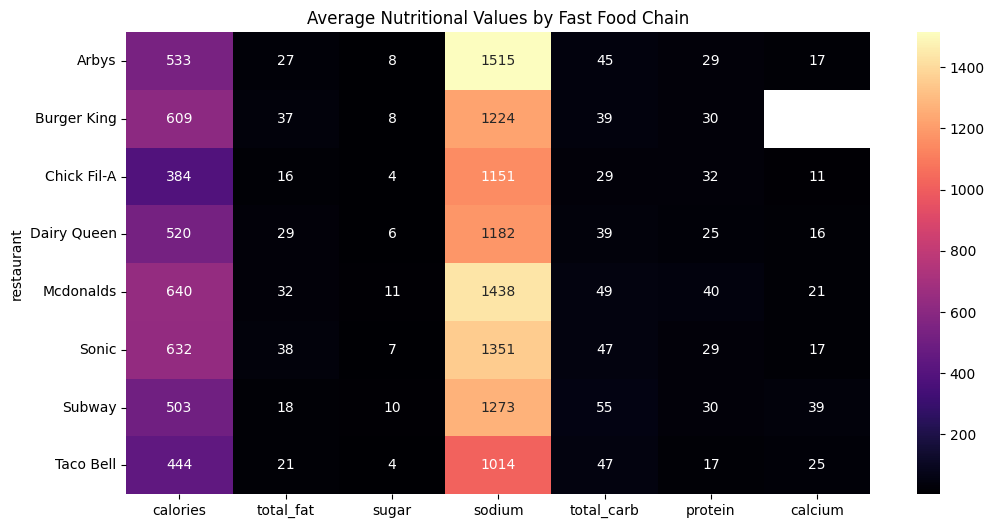

In [12]:
plt.figure(figsize=(14,6))
sns.barplot(x="restaurant", y="calories", data=average_values, hue='restaurant')
plt.xticks(rotation=45)
plt.title("Average Calories by Fast Food Chain")
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(average_values.set_index("restaurant"), annot=True, cmap="magma", fmt=".0f")
plt.title("Average Nutritional Values by Fast Food Chain")
plt.show()



In [26]:
import plotly.express as px

# Select a restaurant
restaurant_name = "Mcdonalds"
selected_restaurant = average_values[average_values["restaurant"] == restaurant_name].drop(columns=["restaurant"])

# Create radar chart
fig = px.line_polar(r=selected_restaurant.values.flatten(),
                     theta=selected_restaurant.columns,
                     line_close=True,
                     title=f"Nutritional Profile of {restaurant_name}")
fig.show()

##Relationships between numerical variables of dataset: calories, fats, cholesterol, sodium, carbs, fiber, sugar, protein, vit a, vit c, fiber.

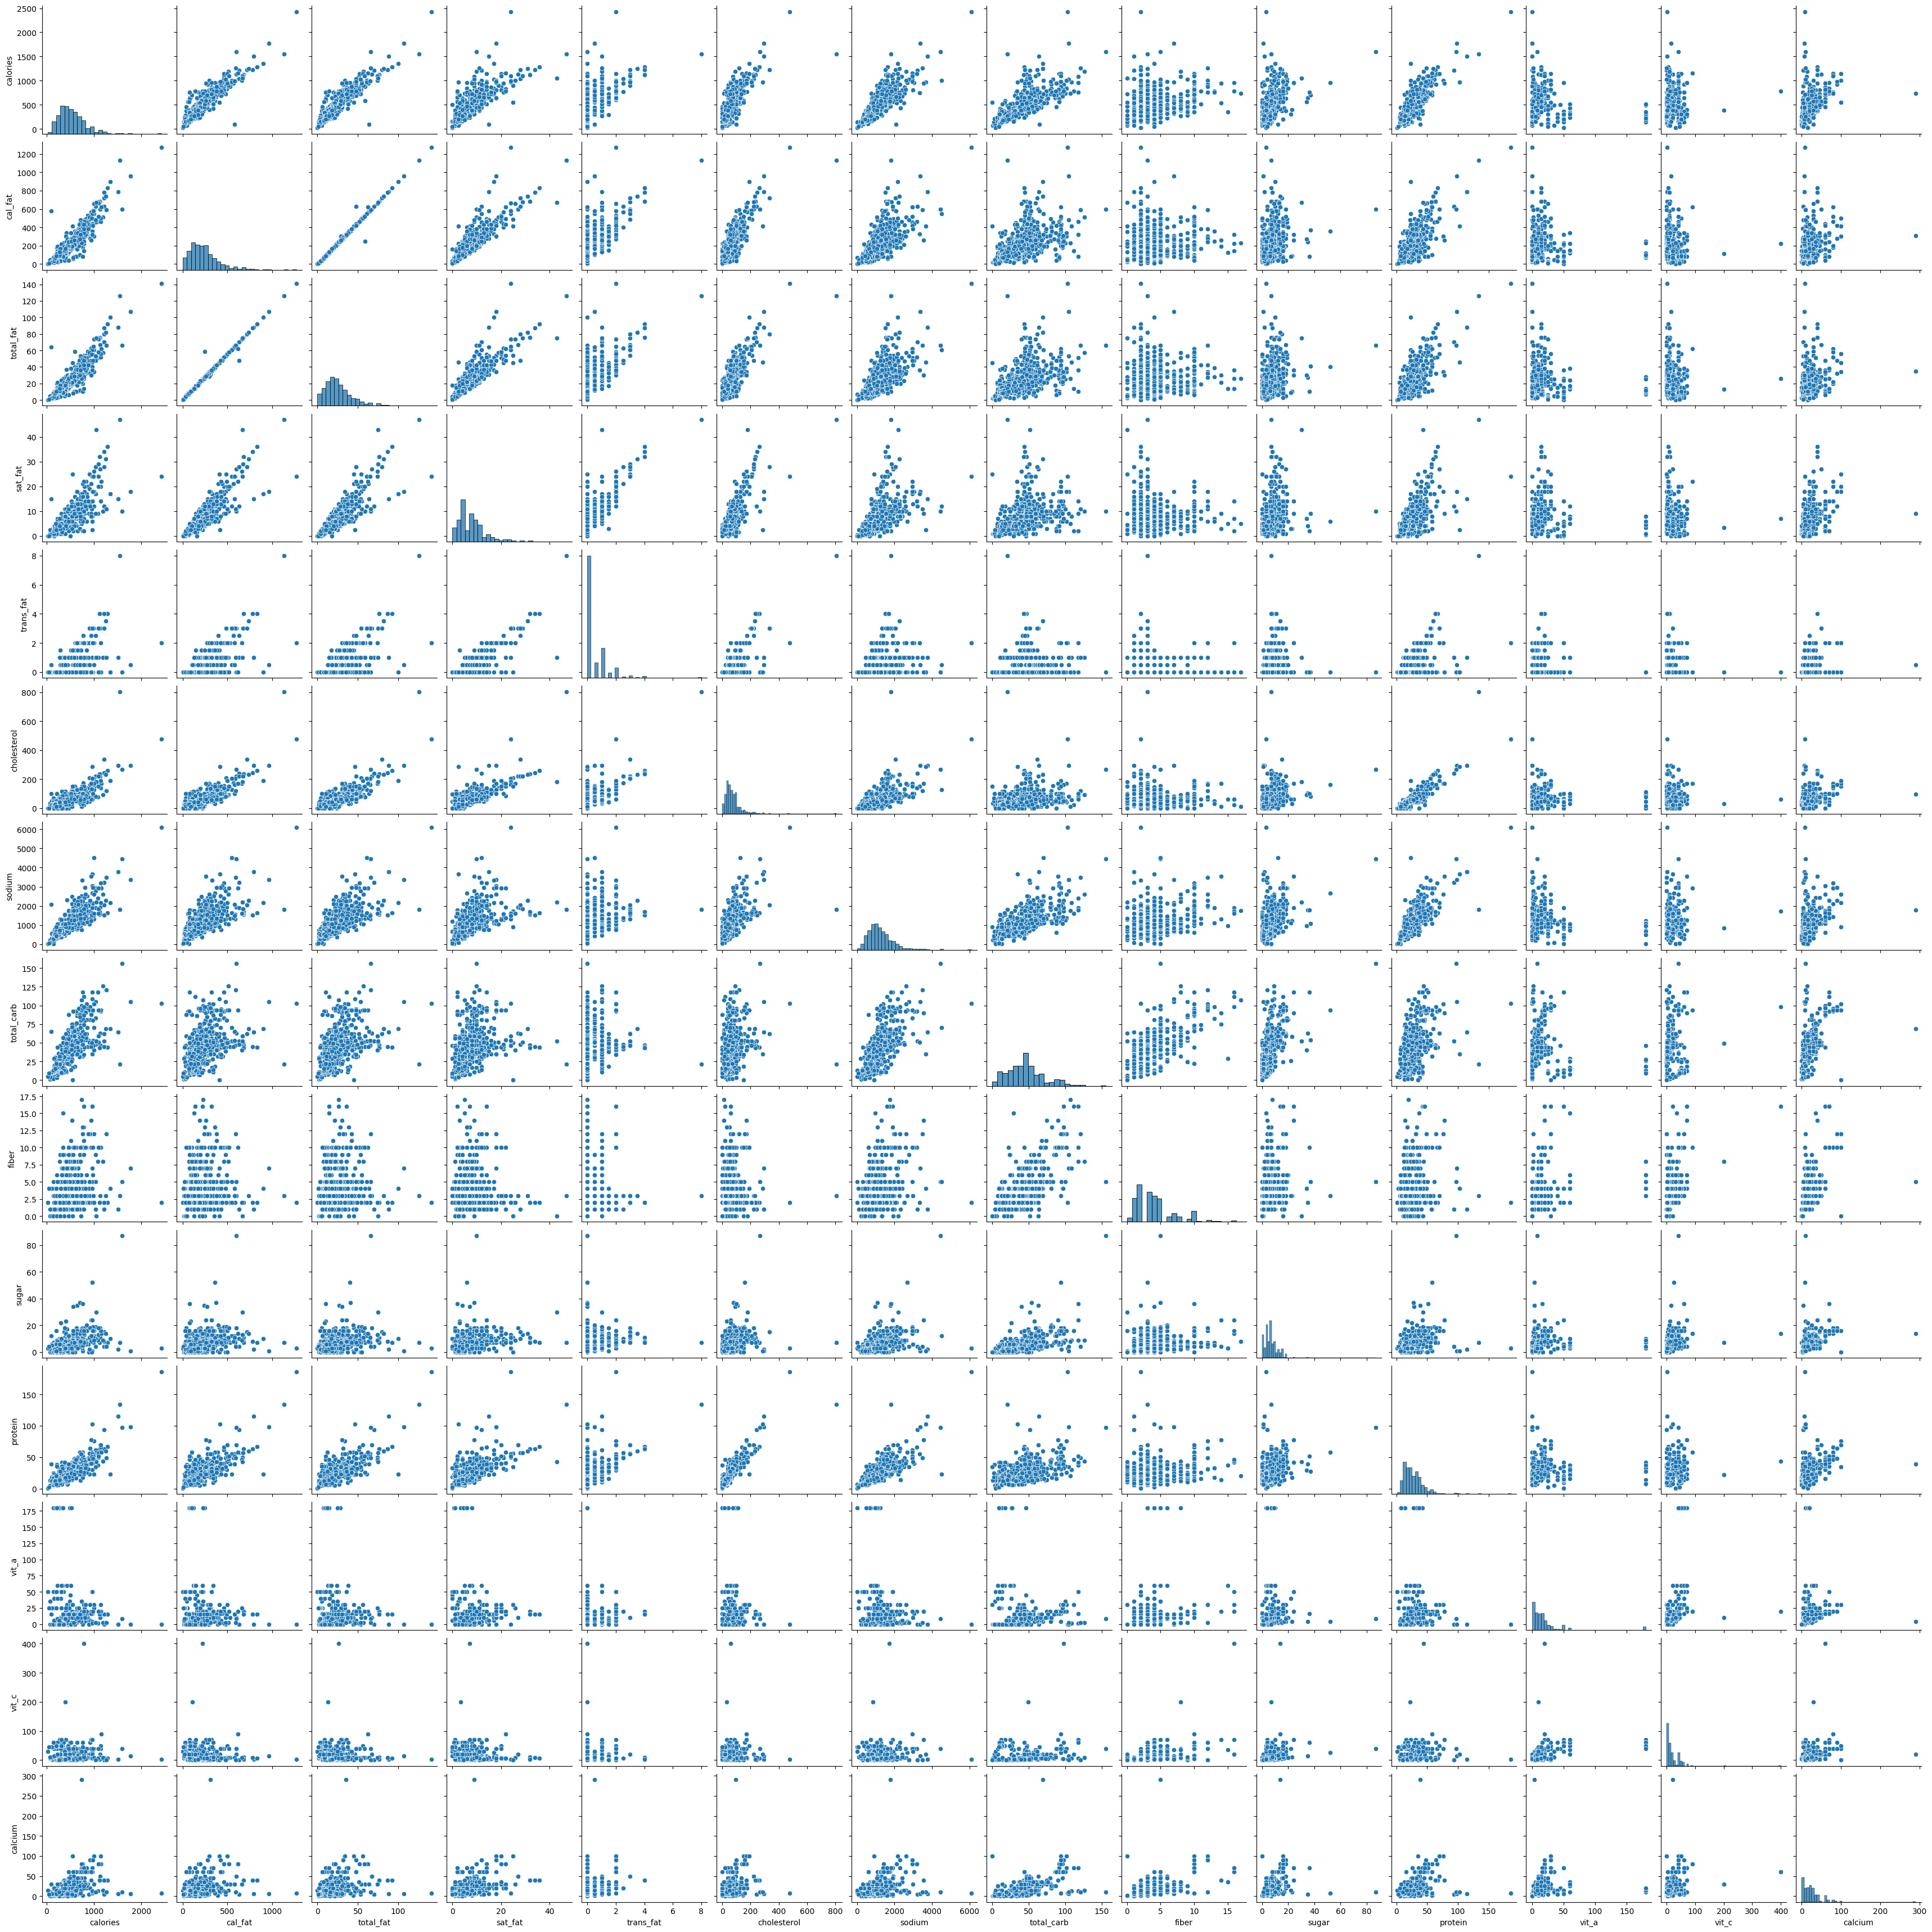

In [27]:
numeric_data = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_data)
plt.show()

## Here are some more relationships between variables.

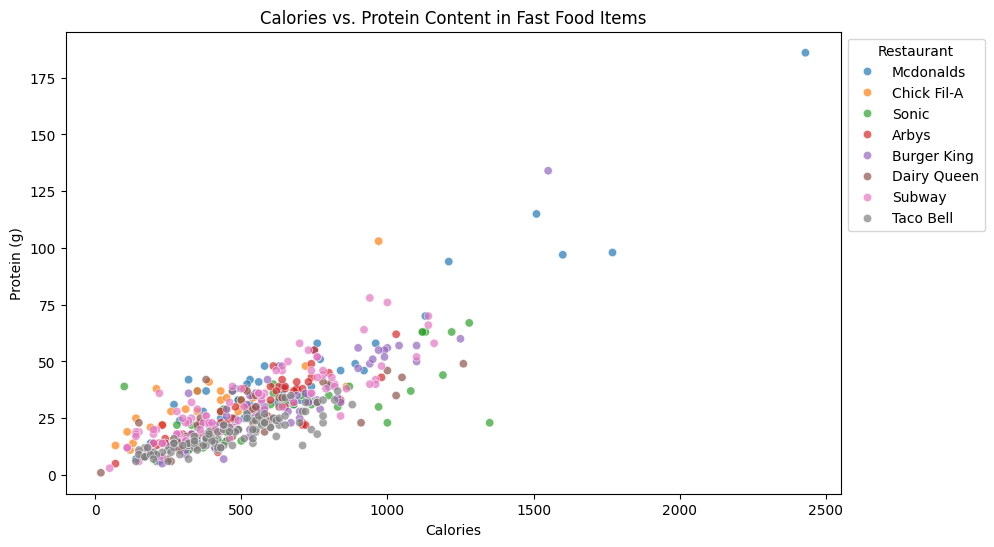

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="calories", y="protein", hue="restaurant", alpha=0.7)
plt.title("Calories vs. Protein Content in Fast Food Items")
plt.xlabel("Calories")
plt.ylabel("Protein (g)")
plt.legend(title="Restaurant", bbox_to_anchor=(1,1))
plt.show()



## Here we tried to find correlation between the nutritional variables.

             calories   cal_fat  total_fat   sat_fat  trans_fat  cholesterol  \
calories     1.000000  0.901661   0.900494  0.739664   0.530354     0.762460   
cal_fat      0.901661  1.000000   0.995311  0.852150   0.648422     0.803997   
total_fat    0.900494  0.995311   1.000000  0.846716   0.648821     0.801352   
sat_fat      0.739664  0.852150   0.846716  1.000000   0.812126     0.764030   
trans_fat    0.530354  0.648422   0.648821  0.812126   1.000000     0.680858   
cholesterol  0.762460  0.803997   0.801352  0.764030   0.680858     1.000000   
sodium       0.817855  0.670458   0.669182  0.487456   0.261466     0.596164   
total_carb   0.712701  0.419373   0.422543  0.276534   0.100284     0.238728   
fiber        0.287031  0.032643   0.036386 -0.041220  -0.121890    -0.061503   
sugar        0.437711  0.255485   0.259370  0.234218   0.112651     0.298259   
protein      0.831957  0.720379   0.719518  0.603645   0.478960     0.880960   
vit_a       -0.153963 -0.121748  -0.1222

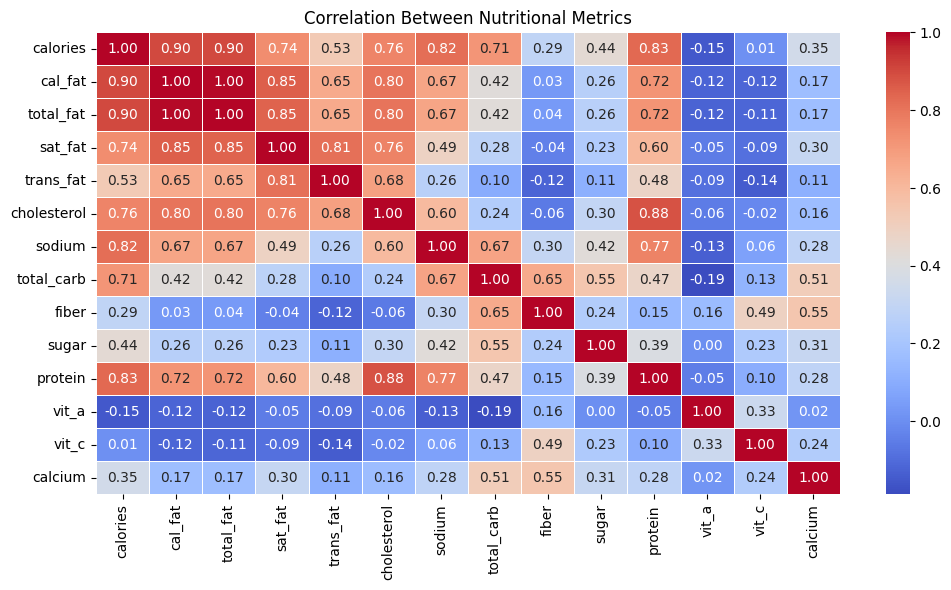

In [8]:
nutritional_metrics = df.select_dtypes(include=['number']).columns

# Compute correlation matrix
correlation_matrix = df[nutritional_metrics].corr()

# Display correlation matrix
print(correlation_matrix)

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Nutritional Metrics")
plt.show()

There seems to a least be some correlation between several of the nutritional values. For instance higher calories correlates to higher fat, cholesterol, carbs, and protein.

## Here I created a metric to measure overall heatlh of each fast food restaurant. With this metric, rankings can be made to determine which establishments are healthier than others.

    restaurant  health_score
7    Taco Bell    386.882609
2  Chick Fil-A    389.333333
3  Dairy Queen    453.745238
6       Subway    462.355208
1  Burger King    500.005714
0        Arbys    524.996364
5        Sonic    534.775472
4    Mcdonalds    554.368421


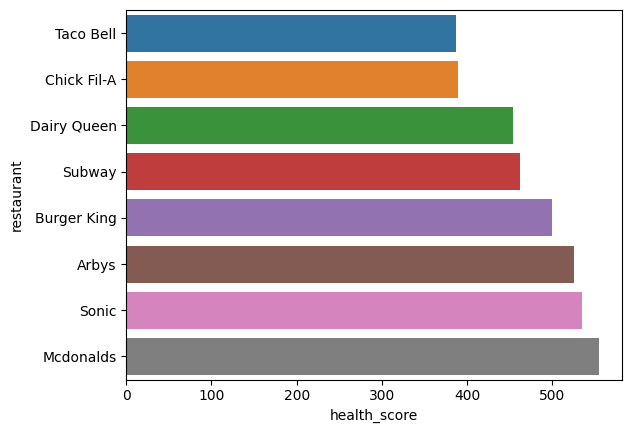

In [23]:

# Calculate the average nutrients per restaurant
nutrient_averages = df.groupby("restaurant").agg({
    "calories": "mean",
    "total_fat": "mean",
    "sodium": "mean",
    "sugar": "mean"
}).reset_index()

# Compute health score (lower is better)
nutrient_averages["health_score"] = (
    nutrient_averages["calories"] * 0.4 +
    nutrient_averages["total_fat"] * 0.3 +
    nutrient_averages["sodium"] * 0.2 +
    nutrient_averages["sugar"] * 0.1
)

nutrient_averages = nutrient_averages.sort_values(by="health_score", ascending=True)

print(nutrient_averages[["restaurant", "health_score"]].head(10))

sns.barplot(x="health_score", y="restaurant", hue='restaurant', data=nutrient_averages.head(10));


According to our own created metric, the restaurants in order from most healthy to most healthy are as follows: Taco Bell, Chick Fil-A, DQ, Subway, Burger King, Arbys, Sonic, and McDonalds.